#**Case Study: Sales Analysis**

This case study uses Pandas and Matplotlib to analyze and visualize some sales data.
This case study explore four business questions related to the data:

*   What was the best month for sales? How much was earned in that month?
*   What city sold the most products?
*   What time should we display advertisements to maximize the likelihood of customers buying products?
*   What product sold the most?




In [ ]:
# mount google colab drive, just need to do this once
from google.colab import drive
drive.mount('/content/gdrive')

data_dir = '/content/gdrive/My Drive/Colab Notebooks/Case_Study/Sales_Analysis/Datasets'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#Merge CSV Data from Each Month

In [ ]:
# create a dataframe
all_data = pd.DataFrame()

In [ ]:
# read from all files
files = [file for file in os.listdir(data_dir) if not file.startswith('.')] # Ignore hidden files
for file in files:
    current_data = pd.read_csv(f"{data_dir}/{file}")
    all_data = pd.concat([all_data, current_data], ignore_index=True)

In [ ]:
print(all_data.shape)
all_data.head(60)

(186850, 6)


Order ID                     Product Quantity Ordered Price Each  \
0    222910    Apple Airpods Headphones                1        150   
1    222911               Flatscreen TV                1        300   
2    222912       AA Batteries (4-pack)                1       3.84   
3    222913       AA Batteries (4-pack)                1       3.84   
4    222914      AAA Batteries (4-pack)                5       2.99   
5    222915  Bose SoundSport Headphones                1      99.99   
6    222916                Google Phone                1        600   
7    222917                    LG Dryer                1      600.0   
8    222918        USB-C Charging Cable                1      11.95   
9    222919    Lightning Charging Cable                1      14.95   
10   222920       AA Batteries (4-pack)                1       3.84   
11   222921    Lightning Charging Cable                1      14.95   
12   222922      34in Ultrawide Monitor                1     379.99   
13   222923      AAA Batteries (4-pack)                1       2.99   
14   222924  Bose SoundSport Headphones                1      99.99   
15   222925    Apple Airpods Headphones                1        150   
16   222926    Lightning Charging Cable                2      14.95   
17   222927            Wired Headphones                1      11.99   
18   222928                Google Phone                1        600   
19   222929             Vareebadd Phone                1        400   
20   222930    Lightning Charging Cable                1      14.95   
21   222931        USB-C Charging Cable                1      11.95   
22   222932            Wired Headphones                1      11.99   
23   222933                    LG Dryer                1      600.0   
24   222934       AA Batteries (4-pack)                2       3.84   
25   222935      AAA Batteries (4-pack)                1       2.99   
26   222936            27in FHD Monitor                1     149.99   
27   222937    Lightning Charging Cable                2      14.95   
28   222938               Flatscreen TV                1        300   
29   222939    Apple Airpods Headphones                1        150   
30   222940            Wired Headphones                2      11.99   
31   222941    Apple Airpods Headphones                1        150   
32   222942    Lightning Charging Cable                1      14.95   
33   222943    Lightning Charging Cable                1      14.95   
34   222944            27in FHD Monitor                1     149.99   
35   222945            Wired Headphones                1      11.99   
36   222946                20in Monitor                1     109.99   
37   222947             ThinkPad Laptop                1     999.99   
38   222948        USB-C Charging Cable                1      11.95   
39   222949        USB-C Charging Cable                1      11.95   
40   222950    Lightning Charging Cable                1      14.95   
41   222951    Apple Airpods Headphones                1        150   
42   222952    Lightning Charging Cable                1      14.95   
43   222953    Lightning Charging Cable                1      14.95   
44   222954       AA Batteries (4-pack)                2       3.84   
45   222955        USB-C Charging Cable                1      11.95   
46   222956      27in 4K Gaming Monitor                1     389.99   
47   222957      AAA Batteries (4-pack)                1       2.99   
48   222958      AAA Batteries (4-pack)                1       2.99   
49   222959             ThinkPad Laptop                1     999.99   
50   222960    Lightning Charging Cable                1      14.95   
51   222961    Lightning Charging Cable                1      14.95   
52   222962            Wired Headphones                1      11.99   
53   222963        USB-C Charging Cable                1      11.95   
54   222964          Macbook Pro Laptop                1       1700   
55   222965      AAA Batter

In [ ]:
# write to a single file
all_data.to_csv(f"{data_dir}/all_sales_data.csv", index=False)

#Clean Up Data

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Remove Repeated Column Header

In [ ]:
all_data.head(967)

Order ID                 Product  Quantity Ordered  Price Each  \
0      194095        Wired Headphones                 1       11.99   
1      194096   AA Batteries (4-pack)                 1        3.84   
2      194097        27in FHD Monitor                 1      149.99   
3      194098        Wired Headphones                 1       11.99   
4      194099  AAA Batteries (4-pack)                 2        2.99   
..        ...                     ...               ...         ...   
962    195005        Wired Headphones                 1       11.99   
963    195006    USB-C Charging Cable                 1       11.95   
964  Order ID                 Product  Quantity Ordered  Price Each   
965    195007                  iPhone                 1         700   
966    195008                  iPhone                 1         700   

         Order Date                         Purchase Address  
0    05/16/19 17:14      669 2nd St, New York City, NY 10001  
1    05/19/19 14:43          844 Walnut St, Dallas, TX 75001  
2    05/24/19 11:36  164 Madison St, New York City, NY 10001  
3    05/02/19 20:40          622 Meadow St, Dallas, TX 75001  
4    05/11/19 22:55          17 Church St, Seattle, WA 98101  
..              ...                                      ...  
962  05/08/19 05:32        939 Walnut St, Portland, OR 97035  
963  05/07/19 17:23   618 Spruce St, San Francisco, CA 94016  
964      Order Date                         Purchase Address  
965  05/14/19 08:45        757 Meadow St, Portland, OR 97035  
966  05/09/19 10:29           305 Lake St, Seattle, WA 98101  

[967 rows x 6 columns]

In [ ]:
# get rid of repeated column hearder
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [ ]:
all_data.head(944)

Order ID                     Product Quantity Ordered Price Each  \
0     222910    Apple Airpods Headphones                1        150   
1     222911               Flatscreen TV                1        300   
2     222912       AA Batteries (4-pack)                1       3.84   
3     222913       AA Batteries (4-pack)                1       3.84   
4     222914      AAA Batteries (4-pack)                5       2.99   
..       ...                         ...              ...        ...   
940   223812  Bose SoundSport Headphones                1      99.99   
941   223813                      iPhone                1        700   
942   223814        USB-C Charging Cable                1      11.95   
943   223815    Lightning Charging Cable                1      14.95   
944   223816        USB-C Charging Cable                1      11.95   

         Order Date                       Purchase Address  
0    07/26/19 16:51        389 South St, Atlanta, GA 30301  
1    07/05/19 08:55          590 4th St, Seattle, WA 98101  
2    07/29/19 12:41         861 Hill St, Atlanta, GA 30301  
3    07/28/19 10:15        190 Ridge St, Atlanta, GA 30301  
4    07/31/19 02:13       824 Forest St, Seattle, WA 98101  
..              ...                                    ...  
940  07/15/19 20:58  36 Willow St, San Francisco, CA 94016  
941  07/05/19 20:15      690 8th St, Los Angeles, CA 90001  
942  07/25/19 17:07          83 Adams St, Dallas, TX 75001  
943  07/06/19 15:08   406 Church St, Los Angeles, CA 90001  
944  07/05/19 10:36    233 9th St, New York City, NY 10001  

[944 rows x 6 columns]

## Remove Rows Containing NaN

In [ ]:
# check rows with any NaN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

Order ID Product Quantity Ordered Price Each Order Date  \
58          NaN     NaN              NaN        NaN        NaN   
111         NaN     NaN              NaN        NaN        NaN   
522         NaN     NaN              NaN        NaN        NaN   
839         NaN     NaN              NaN        NaN        NaN   
1590        NaN     NaN              NaN        NaN        NaN   
...         ...     ...              ...        ...        ...   
184390      NaN     NaN              NaN        NaN        NaN   
184779      NaN     NaN              NaN        NaN        NaN   
185239      NaN     NaN              NaN        NaN        NaN   
185614      NaN     NaN              NaN        NaN        NaN   
185993      NaN     NaN              NaN        NaN        NaN   

       Purchase Address  
58                  NaN  
111                 NaN  
522                 NaN  
839                 NaN  
1590                NaN  
...                 ...  
184390              NaN  
184779              NaN  
185239              NaN  
185614              NaN  
185993              NaN  

[545 rows x 6 columns]

In [ ]:
# drop rows
all_data = all_data.dropna(how='all')
all_data.head(60)

Order ID                     Product Quantity Ordered Price Each  \
0    194095            Wired Headphones                1      11.99   
1    194096       AA Batteries (4-pack)                1       3.84   
2    194097            27in FHD Monitor                1     149.99   
3    194098            Wired Headphones                1      11.99   
4    194099      AAA Batteries (4-pack)                2       2.99   
5    194100                      iPhone                1      700.0   
6    194101        USB-C Charging Cable                1      11.95   
7    194102    Lightning Charging Cable                1      14.95   
8    194103            27in FHD Monitor                1     149.99   
9    194104            Wired Headphones                1      11.99   
10   194105             ThinkPad Laptop                1     999.99   
11   194106        USB-C Charging Cable                1      11.95   
12   194107      34in Ultrawide Monitor                1     379.99   
13   194108       AA Batteries (4-pack)                1       3.84   
14   194109      AAA Batteries (4-pack)                1       2.99   
15   194110                Google Phone                1      600.0   
16   194110            Wired Headphones                1      11.99   
17   194111            27in FHD Monitor                1     149.99   
18   194112                Google Phone                1      600.0   
19   194113    Apple Airpods Headphones                1      150.0   
20   194114            Wired Headphones                1      11.99   
21   194115      AAA Batteries (4-pack)                1       2.99   
22   194116    Lightning Charging Cable                1      14.95   
23   194117    Lightning Charging Cable                1      14.95   
24   194118       AA Batteries (4-pack)                1       3.84   
25   194119            Wired Headphones                3      11.99   
26   194120      AAA Batteries (4-pack)                1       2.99   
27   194121                    LG Dryer                1      600.0   
28   194122            Wired Headphones                1      11.99   
29   194123    Apple Airpods Headphones                1      150.0   
30   194124                      iPhone                1      700.0   
31   194125  Bose SoundSport Headphones                1      99.99   
32   194126      AAA Batteries (4-pack)                2       2.99   
33   194127            Wired Headphones                1      11.99   
34   194128      AAA Batteries (4-pack)                2       2.99   
35   194129       AA Batteries (4-pack)                2       3.84   
36   194130      34in Ultrawide Monitor                1     379.99   
37   194131  Bose SoundSport Headphones                1      99.99   
38   194132                      iPhone                1      700.0   
39   194133  Bose SoundSport Headphones                1      99.99   
40   194134        USB-C Charging Cable                1      11.95   
41   194135  Bose SoundSport Headphones                1      99.99   
42   194136            Wired Headphones                1      11.99   
43   194137            27in FHD Monitor                1     149.99   
44   194138    Lightning Charging Cable                1      14.95   
45   194139    Apple Airpods Headphones                1      150.0   
46   194140    Lightning Charging Cable                1      14.95   
47   194141            Wired Headphones                1      11.99   
48   194142            27in FHD Monitor                1     149.99   
49   194143    Apple Airpods Headphones                1      150.0   
50   194144        USB-C Charging Cable                1      11.95   
51   194145       AA Batteries (4-pack)                1       3.84   
52   194146      AAA Batteries (4-pack)                2       2.99   
53   194147               Flatscreen TV                1      300.0   
54   194148      27in 4K Gaming Monitor                1     389.99   
55   194149            27in

## Convert Some Columns to Numerics

In [ ]:
# convert some columns to numerics
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data

Order ID                   Product  Quantity Ordered  Price Each  \
0        222910  Apple Airpods Headphones               1.0      150.00   
1        222911             Flatscreen TV               1.0      300.00   
2        222912     AA Batteries (4-pack)               1.0        3.84   
3        222913     AA Batteries (4-pack)               1.0        3.84   
4        222914    AAA Batteries (4-pack)               5.0        2.99   
...         ...                       ...               ...         ...   
186845   278792     AA Batteries (4-pack)               1.0        3.84   
186846   278793          Wired Headphones               1.0       11.99   
186847   278794     AA Batteries (4-pack)               1.0        3.84   
186848   278795                    iPhone               1.0      700.00   
186849   278796          Wired Headphones               1.0       11.99   

            Order Date                         Purchase Address  
0       07/26/19 16:51          389 South St, Atlanta, GA 30301  
1       07/05/19 08:55            590 4th St, Seattle, WA 98101  
2       07/29/19 12:41           861 Hill St, Atlanta, GA 30301  
3       07/28/19 10:15          190 Ridge St, Atlanta, GA 30301  
4       07/31/19 02:13         824 Forest St, Seattle, WA 98101  
...                ...                                      ...  
186845  10/12/19 04:32    920 Adams St, San Francisco, CA 94016  
186846  10/28/19 22:00   161 Chestnut St, Los Angeles, CA 90001  
186847  10/09/19 20:58   346 Spruce St, San Francisco, CA 94016  
186848  10/31/19 17:21           291 Hill St, Seattle, WA 98101  
186849  10/13/19 11:20  547 Jefferson St, Los Angeles, CA 90001  

[186495 rows x 6 columns]

## Add Additional Columns

In [ ]:
# add an additional month column
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

# # alternative to add month column
#all_data['Month'] = all_data['Order Date'].str[0:2]
#all_data['Month'] = pd.to_numeric(all_data['Month'])

<ipython-input-13-4fb042aebfc6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month


Order ID                   Product  Quantity Ordered  Price Each  \
0   222910  Apple Airpods Headphones               1.0      150.00   
1   222911             Flatscreen TV               1.0      300.00   
2   222912     AA Batteries (4-pack)               1.0        3.84   
3   222913     AA Batteries (4-pack)               1.0        3.84   
4   222914    AAA Batteries (4-pack)               5.0        2.99   

       Order Date                  Purchase Address  Month  
0  07/26/19 16:51   389 South St, Atlanta, GA 30301    7.0  
1  07/05/19 08:55     590 4th St, Seattle, WA 98101    7.0  
2  07/29/19 12:41    861 Hill St, Atlanta, GA 30301    7.0  
3  07/28/19 10:15   190 Ridge St, Atlanta, GA 30301    7.0  
4  07/31/19 02:13  824 Forest St, Seattle, WA 98101    7.0

In [ ]:
# add a city (State) column
def get_city(address):
    if isinstance(address, str):
        return address.split(",")[1].strip(" ")
    return None

def get_state(address):
    if isinstance(address, str):
        return address.split(",")[2].split(" ")[1]
    return None

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0   222910  Apple Airpods Headphones               1.0      150.00   
1   222911             Flatscreen TV               1.0      300.00   
2   222912     AA Batteries (4-pack)               1.0        3.84   
3   222913     AA Batteries (4-pack)               1.0        3.84   
4   222914    AAA Batteries (4-pack)               5.0        2.99   

       Order Date                  Purchase Address  Month           City  
0  07/26/19 16:51   389 South St, Atlanta, GA 30301    7.0  Atlanta  (GA)  
1  07/05/19 08:55     590 4th St, Seattle, WA 98101    7.0  Seattle  (WA)  
2  07/29/19 12:41    861 Hill St, Atlanta, GA 30301    7.0  Atlanta  (GA)  
3  07/28/19 10:15   190 Ridge St, Atlanta, GA 30301    7.0  Atlanta  (GA)  
4  07/31/19 02:13  824 Forest St, Seattle, WA 98101    7.0  Seattle  (WA)

#Explore Data


##Question 1

What was the best month for sales? How much was earned that month?

In [ ]:
# add a sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0   222910  Apple Airpods Headphones               1.0      150.00   
1   222911             Flatscreen TV               1.0      300.00   
2   222912     AA Batteries (4-pack)               1.0        3.84   
3   222913     AA Batteries (4-pack)               1.0        3.84   
4   222914    AAA Batteries (4-pack)               5.0        2.99   

       Order Date                  Purchase Address  Month           City  \
0  07/26/19 16:51   389 South St, Atlanta, GA 30301    7.0  Atlanta  (GA)   
1  07/05/19 08:55     590 4th St, Seattle, WA 98101    7.0  Seattle  (WA)   
2  07/29/19 12:41    861 Hill St, Atlanta, GA 30301    7.0  Atlanta  (GA)   
3  07/28/19 10:15   190 Ridge St, Atlanta, GA 30301    7.0  Atlanta  (GA)   
4  07/31/19 02:13  824 Forest St, Seattle, WA 98101    7.0  Seattle  (WA)   

    Sales  
0  150.00  
1  300.00  
2    3.84  
3    3.84  
4   14.95

In [ ]:
# sum of sales by months
monthly_sales = all_data.groupby('Month').sum()
monthly_sales

Order ID  \
Month                                                      
1.0    2971502978172978172979692983442990492991253003...   
2.0    1452121453721464421473091476631489871505021505...   
3.0    1620091620091620091620101620111620121620131620...   
4.0    1623581625411650071656221662501663091665671672...   
5.0    1940951940961940971940981940991941001941011941...   
6.0    1957481958691960721961321966381966391976981990...   
7.0    2229102229112229122229132229142229152229162229...   
8.0    2237102255412256582271152275212275212277322296...   
9.0    2388342392852406362410542423432428652436672449...   
10.0   2486432501392501392502752506842512432521642522...   
11.0   2787972787982787992788002788012788022788032788...   
12.0   2956652956662956672956682956692956702956712956...   

                                                 Product  Quantity Ordered  \
Month                                                                        
1.0    Lightning Charging CableiPhoneLightning Chargi...           10903.0   
2.0    Lightning Charging CableAAA Batteries (4-pack)...           13449.0   
3.0    iPhoneLightning Charging CableWired Headphones...           17005.0   
4.0    Flatscreen TVAAA Batteries (4-pack)34in Ultraw...           20558.0   
5.0    Wired HeadphonesAA Batteries (4-pack)27in FHD ...           18667.0   
6.0    27in FHD MonitorAAA Batteries (4-pack)Lightnin...           15253.0   
7.0    Apple Airpods HeadphonesFlatscreen TVAA Batter...           16072.0   
8.0    Bose SoundSport Headphones27in 4K Gaming Monit...           13448.0   
9.0    Apple Airpods Headphones34in Ultrawide Monitor...           13109.0   
10.0   Lightning Charging CableGoogle PhoneUSB-C Char...           22703.0   
11.0   Wired HeadphonesUSB-C Charging CableApple Airp...           19798.0   
12.0   Macbook Pro LaptopLG Washing MachineUSB-C Char...           28114.0   

       Price Each                                         Order Date  \
Month                                                                  
1.0    1811768.38  01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...   
2.0    2188884.72  02/01/19 00:3602/01/19 04:0202/01/19 01:4802/0...   
3.0    2791207.83  03/28/19 20:5903/28/19 20:5903/28/19 20:5903/1...   
4.0    3367671.02  04/01/19 01:1104/01/19 01:1504/01/19 00:1204/0...   
5.0    3135125.13  05/16/19 17:1405/19/19 14:4305/24/19 11:3605/0...   
6.0    2562025.61  06/01/19 03:2606/01/19 01:0606/01/19 00:1806/0...   
7.0    2632539.56  07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...   
8.0    2230345.42  08/01/19 01:5608/01/19 01:1508/01/19 01:1408/0...   
9.0    2084992.09  09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...   
10.0   3715554.83  10/01/19 01:3610/01/19 00:5310/01/19 00:5310/0...   
11.0   3180600.68  11/21/19 09:5411/17/19 10:0311/19/19 14:5611/2...   
12.0   4588415.41  12/30/19 00:0112/29/19 07:0312/12/19 18:2112/2...   

                                        Purchase Address  \
Month                                                      
1.0    427 Wilson St, Dallas, TX 75001519 13th St, Ne...   
2.0    484 6th St, Dallas, TX 75001459 West St, Dalla...   
3.0    942 Church St, Austin, TX 73301942 Church St, ...   
4.0    444 12th St, New York City, NY 10001672 2nd St...   
5.0    669 2nd St, New York City, NY 10001844 Walnut ...   
6.0    856 Elm St, San Francisco, CA 94016877 Center ...   
7.0    389 South St, Atlanta, GA 30301590 4th St, Sea...   
8.0    882 Lake St, San Francisco, CA 94016480 Spruce...   
9.0    761 Forest St, San Francisco, CA 94016373 1st ...   
10.0   321 Chestnut St, Austin, TX 73301132 10th St, ...   
11.0   46 Park St, New York City, NY 10001962 Hickory...   
12.0   136 Church St, New York City, NY 10001562 2nd ...   

                                                    City       Sales  
Month                                                                 
1.0    Dallas  (TX)New York City  (NY)New York City  ...  1822256.73  
2.0    Dallas  (TX)Dallas  (TX)Los Angeles  (CA)Dal

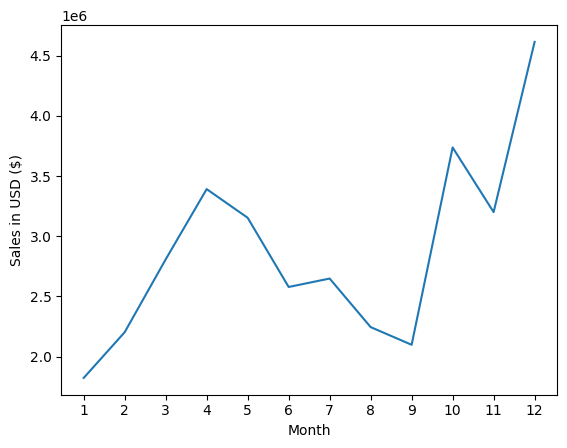

Best selling month: 12.0
Sales amount： 4613443.34


In [ ]:
# plot a sales line graph
months = range(1,13)

plt.plot(months, monthly_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

# max sales month
print(f"Best selling month: {monthly_sales.Sales.idxmax()}")
print(f"Sales amount： {monthly_sales.Sales.max()}")

## Question 2

What city sold the most product that year?


In [ ]:
city_sales = all_data.groupby(['City']).sum()
print(city_sales)

                                                              Order ID  \
City                                                                     
Atlanta  (GA)        2229102229122229132229562229702229802230002230...   
Austin  (TX)         2229712229812229842230052230122230272230402230...   
Boston  (MA)         2229292229312229362229632229642229832229982230...   
Dallas  (TX)         2229192229222229382229492229502229542229582229...   
Los Angeles  (CA)    2229182229232229262229272229322229332229392229...   
New York City  (NY)  2229162229172229462229472229872229902229942229...   
None  (None)                                                         0   
Portland  (ME)       2231342232512233112234052234062234322234462235...   
Portland  (OR)       2229422229572229822230072230342230352230482230...   
San Francisco  (CA)  2229152229202229212229242229252229282229302229...   
Seattle  (WA)        2229112229142229342229432229622229662229722229...   

                                     

In [ ]:
# sort sales by descending order
city_sales = city_sales.sort_values(by=['Sales'], ascending=False)
print(city_sales)

                                                              Order ID  \
City                                                                     
San Francisco  (CA)  2229152229202229212229242229252229282229302229...   
Los Angeles  (CA)    2229182229232229262229272229322229332229392229...   
New York City  (NY)  2229162229172229462229472229872229902229942229...   
Boston  (MA)         2229292229312229362229632229642229832229982230...   
Atlanta  (GA)        2229102229122229132229562229702229802230002230...   
Dallas  (TX)         2229192229222229382229492229502229542229582229...   
Seattle  (WA)        2229112229142229342229432229622229662229722229...   
Portland  (OR)       2229422229572229822230072230342230352230482230...   
Austin  (TX)         2229712229812229842230052230122230272230402230...   
Portland  (ME)       2231342232512233112234052234062234322234462235...   
None  (None)                                                         0   

                                     

In [ ]:
city_sales.reset_index(inplace=True)
print(city_sales)

                   City                                           Order ID  \
0   San Francisco  (CA)  2229152229202229212229242229252229282229302229...   
1     Los Angeles  (CA)  2229182229232229262229272229322229332229392229...   
2   New York City  (NY)  2229162229172229462229472229872229902229942229...   
3          Boston  (MA)  2229292229312229362229632229642229832229982230...   
4         Atlanta  (GA)  2229102229122229132229562229702229802230002230...   
5          Dallas  (TX)  2229192229222229382229492229502229542229582229...   
6         Seattle  (WA)  2229112229142229342229432229622229662229722229...   
7        Portland  (OR)  2229422229572229822230072230342230352230482230...   
8          Austin  (TX)  2229712229812229842230052230122230272230402230...   
9        Portland  (ME)  2231342232512233112234052234062234322234462235...   
10         None  (None)                                                  0   

                                              Product  Quantity

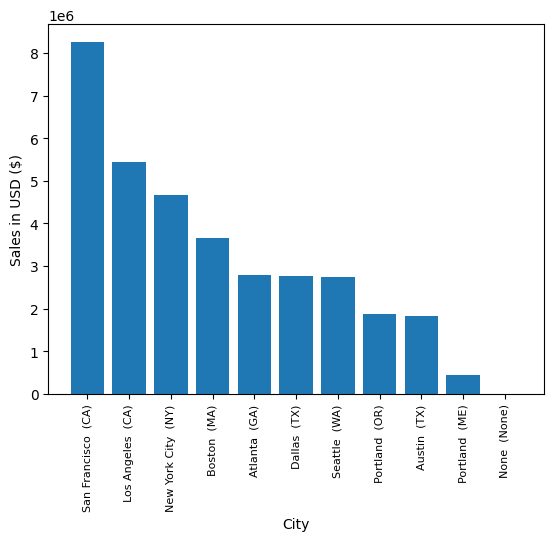

Most selling city: San Francisco  (CA)


In [ ]:
# plot a sales bar graph
plt.bar(city_sales['City'], city_sales['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(city_sales['City'], rotation='vertical', size=8)
plt.show()

# most selling city
most_selling_city = city_sales['City'][city_sales['Sales'] == city_sales['Sales'].max()].to_string().strip("0 ")
print(f"Most selling city: {most_selling_city}")

## Question 3

What time should we display advertisements to maximize likelihood of customer's buying of products?


In [ ]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data.head()

<ipython-input-25-c04f54e35e42>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour


Order ID                   Product  Quantity Ordered  Price Each  \
0   222910  Apple Airpods Headphones               1.0      150.00   
1   222911             Flatscreen TV               1.0      300.00   
2   222912     AA Batteries (4-pack)               1.0        3.84   
3   222913     AA Batteries (4-pack)               1.0        3.84   
4   222914    AAA Batteries (4-pack)               5.0        2.99   

       Order Date                  Purchase Address  Month           City  \
0  07/26/19 16:51   389 South St, Atlanta, GA 30301    7.0  Atlanta  (GA)   
1  07/05/19 08:55     590 4th St, Seattle, WA 98101    7.0  Seattle  (WA)   
2  07/29/19 12:41    861 Hill St, Atlanta, GA 30301    7.0  Atlanta  (GA)   
3  07/28/19 10:15   190 Ridge St, Atlanta, GA 30301    7.0  Atlanta  (GA)   
4  07/31/19 02:13  824 Forest St, Seattle, WA 98101    7.0  Seattle  (WA)   

    Sales  Hour  
0  150.00  16.0  
1  300.00   8.0  
2    3.84  12.0  
3    3.84  10.0  
4   14.95   2.0

In [ ]:
sales_by_hour = all_data.groupby(['Hour']).count()   # number of transactions
sales_by_hour

Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Hour                                                                
0.0       3910     3910              3910        3910        3910   
1.0       2350     2350              2350        2350        2350   
2.0       1243     1243              1243        1243        1243   
3.0        831      831               831         831         831   
4.0        854      854               854         854         854   
5.0       1321     1321              1321        1321        1321   
6.0       2482     2482              2482        2482        2482   
7.0       4011     4011              4011        4011        4011   
8.0       6256     6256              6256        6256        6256   
9.0       8748     8748              8748        8748        8748   
10.0     10944    10944             10944       10944       10944   
11.0     12411    12411             12411       12411       12411   
12.0     12587    12587             12587       12587       12587   
13.0     12129    12129             12129       12129       12129   
14.0     10984    10984             10984       10984       10984   
15.0     10175    10175             10175       10175       10175   
16.0     10384    10384             10384       10384       10384   
17.0     10899    10899             10899       10899       10899   
18.0     12280    12280             12280       12280       12280   
19.0     12905    12905             12905       12905       12905   
20.0     12228    12228             12228       12228       12228   
21.0     10921    10921             10921       10921       10921   
22.0      8822     8822              8822        8822        8822   
23.0      6275     6275              6275        6275        6275   

      Purchase Address  Month   City  Sales  
Hour                                         
0.0               3910   3910   3910   3910  
1.0               2350   2350   2350   2350  
2.0               1243   1243   1243   1243  
3.0                831    831    831    831  
4.0                854    854    854    854  
5.0               1321   1321   1321   1321  
6.0               2482   2482   2482   2482  
7.0               4011   4011   4011   4011  
8.0               6256   6256   6256   6256  
9.0               8748   8748   8748   8748  
10.0             10944  10944  10944  10944  
11.0             12411  12411  12411  12411  
12.0             12587  12587  12587  12587  
13.0             12129  12129  12129  12129  
14.0             10984  10984  10984  10984  
15.0             10175  10175  10175  10175  
16.0             10384  10384  10384  10384  
17.0             10899  10899  10899  10899  
18.0             12280  12280  12280  12280  
19.0             12905  12905  12905  12905  
20.0             12228  12228  12228  12228  
21.0             10921  10921  10921  10921  
22.0              8822   8822   8822   8822  
23.0              6275   6275   6275   6275

In [ ]:
sales_by_hour.reset_index(inplace=True)
sales_by_hour

Hour  Order ID  Product  Quantity Ordered  Price Each  Order Date  \
0    0.0      3910     3910              3910        3910        3910   
1    1.0      2350     2350              2350        2350        2350   
2    2.0      1243     1243              1243        1243        1243   
3    3.0       831      831               831         831         831   
4    4.0       854      854               854         854         854   
5    5.0      1321     1321              1321        1321        1321   
6    6.0      2482     2482              2482        2482        2482   
7    7.0      4011     4011              4011        4011        4011   
8    8.0      6256     6256              6256        6256        6256   
9    9.0      8748     8748              8748        8748        8748   
10  10.0     10944    10944             10944       10944       10944   
11  11.0     12411    12411             12411       12411       12411   
12  12.0     12587    12587             12587       12587       12587   
13  13.0     12129    12129             12129       12129       12129   
14  14.0     10984    10984             10984       10984       10984   
15  15.0     10175    10175             10175       10175       10175   
16  16.0     10384    10384             10384       10384       10384   
17  17.0     10899    10899             10899       10899       10899   
18  18.0     12280    12280             12280       12280       12280   
19  19.0     12905    12905             12905       12905       12905   
20  20.0     12228    12228             12228       12228       12228   
21  21.0     10921    10921             10921       10921       10921   
22  22.0      8822     8822              8822        8822        8822   
23  23.0      6275     6275              6275        6275        6275   

    Purchase Address  Month   City  Sales  
0               3910   3910   3910   3910  
1               2350   2350   2350   2350  
2               1243   1243   1243   1243  
3                831    831    831    831  
4                854    854    854    854  
5               1321   1321   1321   1321  
6               2482   2482   2482   2482  
7               4011   4011   4011   4011  
8               6256   6256   6256   6256  
9               8748   8748   8748   8748  
10             10944  10944  10944  10944  
11             12411  12411  12411  12411  
12             12587  12587  12587  12587  
13             12129  12129  12129  12129  
14             10984  10984  10984  10984  
15             10175  10175  10175  10175  
16             10384  10384  10384  10384  
17             10899  10899  10899  10899  
18             12280  12280  12280  12280  
19             12905  12905  12905  12905  
20             12228  12228  12228  12228  
21             10921  10921  10921  10921  
22              8822   8822   8822   8822  
23              6275   6275   6275   6275

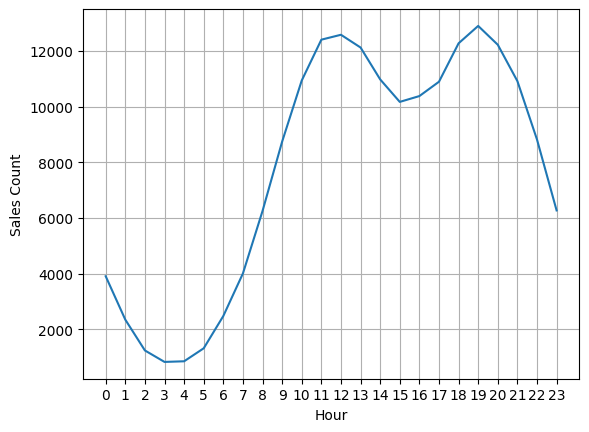

Best time for ads: 19h


In [ ]:
plt.plot(sales_by_hour['Hour'], sales_by_hour['Order ID'])
plt.xticks(sales_by_hour['Hour'])
plt.ylabel('Sales Count')
plt.xlabel('Hour')
plt.grid()
plt.show()

# best time for ads:
print(f"Best time for ads: {sales_by_hour.Product.idxmax()}h")

##Question 4

What product sold the most (in terms of quantity sold and total value)?

In [ ]:
sales_by_product = all_data.groupby('Product').sum()
sales_by_product

Order ID  \
Product                                                                         
20in Monitor                2229462229672231042231772231852232222232622232...   
27in 4K Gaming Monitor      2229562230412230792231132231252231382231842232...   
27in FHD Monitor            2229362229442229912229962230052230202230312231...   
34in Ultrawide Monitor      2229222229952231052231262231632231692231912232...   
AA Batteries (4-pack)       2229122229132229202229342229542229662229682229...   
AAA Batteries (4-pack)      2229142229232229352229572229582229652229692229...   
Apple Airpods Headphones    2229102229252229392229412229512229712230012230...   
Bose SoundSport Headphones  2229152229242229792229802229852230072230122230...   
Flatscreen TV               2229112229382229732229822229992230352230392230...   
Google Phone                2229162229282231172231442231762231802232082232...   
LG Dryer                    2229172229332230452230532231462233552238442245...   
LG Washing Machine          2233102234382234582234902236952240562246812249...   
Lightning Charging Cable    2229192229212229262229302229372229422229432229...   
Macbook Pro Laptop          2229642230662231672231902232162232212233732233...   
ThinkPad Laptop             2229472229592230182230502230622230772230922231...   
USB-C Charging Cable        2229182229312229482229492229552229632229812229...   
Vareebadd Phone             2229292230282230482231062232962233052233132233...   
Wired Headphones            2229272229322229402229452229622229722229752230...   
iPhone                      2230852230872231072231092232692232732233072233...   

                            Quantity Ordered  Price Each  \
Product                                                    
20in Monitor                          4129.0   451068.99   
27in 4K Gaming Monitor                6244.0  2429637.70   
27in FHD Monitor                      7550.0  1125974.93   
34in Ultrawide Monitor                6199.0  2348718.19   
AA Batteries (4-pack)                27635.0    79015.68   
AAA Batteries (4-pack)               31017.0    61716.59   
Apple Airpods Headphones             15661.0  2332350.00   
Bose SoundSport Headphones           13457.0  1332366.75   
Flatscreen TV                         4819.0  1440000.00   
Google Phone                          5532.0  3315000.00   
LG Dryer                               646.0   387600.00   
LG Washing Machine                     666.0   399600.00   
Lightning Charging Cable             23217.0   323787.10   
Macbook Pro Laptop                    4728.0  8030800.00   
ThinkPad Laptop                       4130.0  4127958.72   
USB-C Charging Cable                 23975.0   261740.85   
Vareebadd Phone                       2068.0   826000.00   
Wired Headphones                     20557.0   226395.18   
iPhone                                6849.0  4789400.00   

                                                                   Order Date  \
Product                                                                         
20in Monitor                07/14/19 22:1907/14/19 11:5807/08/19 07:2907/2...   
27in 4K Gaming Monitor      07/11/19 20:1807/11/19 08:1607/18/19 10:2207/0...   
27in FHD Monitor            07/04/19 12:2907/07/19 22:5207/05/19 10:0607/1...   
34in Ultrawide Monitor      07/20/19 21:1207/27/19 16:1507/17/19 00:0607/2...   
AA Batteries (4-pack)       07/29/19 12:4107/28/19 10:1507/30/19 04:4207/0...   
AAA Batteries (4-pack)      07/31/19 02:1307/05/19 12:1607/23/19 12:2007/1...   
Apple Airpods Headphones    07/26/19 16:5107/09/19 02:5907/17/19 21:5307/0...   
Bose SoundSport Headphones  07/03/19 18:3007/13/19 20:4607/11/19 23:5907/1...   
Flatscreen TV               07/05/19 08:5507/20/19 17:4907/18/19 14:4007/2...   
Google Phone                07/21/19 22:3907/15/19 17:1807/11/19 23:2507/1...   
LG Dryer                    07/17/19 13:4407/30/19 13:2007/18/19 20:2207/0...   
LG Washing Machine          07/26/19 19:5507/17/19 01

In [ ]:
sales_by_product.reset_index(inplace=True)
sales_by_product

Product  \
0                 20in Monitor   
1       27in 4K Gaming Monitor   
2             27in FHD Monitor   
3       34in Ultrawide Monitor   
4        AA Batteries (4-pack)   
5       AAA Batteries (4-pack)   
6     Apple Airpods Headphones   
7   Bose SoundSport Headphones   
8                Flatscreen TV   
9                 Google Phone   
10                    LG Dryer   
11          LG Washing Machine   
12    Lightning Charging Cable   
13          Macbook Pro Laptop   
14             ThinkPad Laptop   
15        USB-C Charging Cable   
16             Vareebadd Phone   
17            Wired Headphones   
18                      iPhone   

                                             Order ID  Quantity Ordered  \
0   2229462229672231042231772231852232222232622232...            4129.0   
1   2229562230412230792231132231252231382231842232...            6244.0   
2   2229362229442229912229962230052230202230312231...            7550.0   
3   2229222229952231052231262231632231692231912232...            6199.0   
4   2229122229132229202229342229542229662229682229...           27635.0   
5   2229142229232229352229572229582229652229692229...           31017.0   
6   2229102229252229392229412229512229712230012230...           15661.0   
7   2229152229242229792229802229852230072230122230...           13457.0   
8   2229112229382229732229822229992230352230392230...            4819.0   
9   2229162229282231172231442231762231802232082232...            5532.0   
10  2229172229332230452230532231462233552238442245...             646.0   
11  2233102234382234582234902236952240562246812249...             666.0   
12  2229192229212229262229302229372229422229432229...           23217.0   
13  2229642230662231672231902232162232212233732233...            4728.0   
14  2229472229592230182230502230622230772230922231...            4130.0   
15  2229182229312229482229492229552229632229812229...           23975.0   
16  2229292230282230482231062232962233052233132233...            2068.0   
17  2229272229322229402229452229622229722229752230...           20557.0   
18  2230852230872231072231092232692232732233072233...            6849.0   

    Price Each                                         Order Date  \
0    451068.99  07/14/19 22:1907/14/19 11:5807/08/19 07:2907/2...   
1   2429637.70  07/11/19 20:1807/11/19 08:1607/18/19 10:2207/0...   
2   1125974.93  07/04/19 12:2907/07/19 22:5207/05/19 10:0607/1...   
3   2348718.19  07/20/19 21:1207/27/19 16:1507/17/19 00:0607/2...   
4     79015.68  07/29/19 12:4107/28/19 10:1507/30/19 04:4207/0...   
5     61716.59  07/31/19 02:1307/05/19 12:1607/23/19 12:2007/1...   
6   2332350.00  07/26/19 16:5107/09/19 02:5907/17/19 21:5307/0...   
7   1332366.75  07/03/19 18:3007/13/19 20:4607/11/19 23:5907/1...   
8   1440000.00  07/05/19 08:5507/20/19 17:4907/18/19 14:4007/2...   
9   3315000.00  07/21/19 22:3907/15/19 17:1807/11/19 23:2507/1...   
10   387600.00  07/17/19 13:4407/30/19 13:2007/18/19 20:2207/0...   
11   399600.00  07/26/19 19:5507/17/19 01:2707/04/19 13:2507/2...   
12   323787.10  07/14/19 13:2407/02/19 11:0407/15/19 17:4407/2...   
13  8030800.00  07/24/19 20:1807/16/19 08:3107/21/19 06:3707/1...   
14  4127958.72  07/16/19 09:1507/15/19 13:0707/04/19 08:3907/1...   
15   261740.85  07/14/19 21:1607/18/19 09:2107/10/19 08:1807/2...   
16   826000.00  07/04/19 19:4607/07/19 10:2107/21/19 17:1907/1...   
17   226395.18  07/31/19 20:3407/24/19 17:3207/05/19 15:0607/2...   
18  4789400.00  07/22/19 11:5607/26/19 11:0607/25/19 13:4007/1...   

                                     Purchase Address     Month  \
0   49 Park St, New York City, NY 10001161 13th St...   29336.0   
1   525 6th St, Atlanta, GA 30301330 River St, New...   44440.0   
2   483 West St, Boston, MA 0221570 Meadow St, San...   52558.0   
3   616 Chestnut St, Dallas, TX 75001837 Park St, ...   43304.0   
4   861 Hill St, Atlanta, GA 30301190 Ridge St, At...  145558.0   
5   824 Forest St, Seattle, WA 98101105 Johnson St...  146

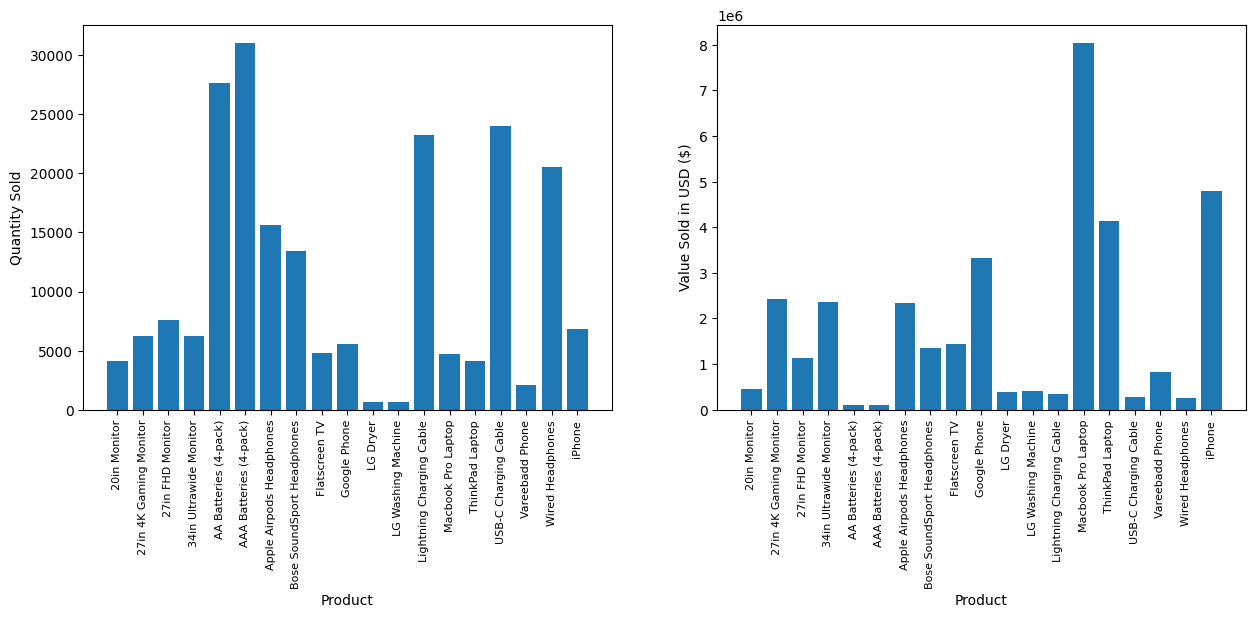

In [ ]:
plt.figure(figsize=(15,5))

# most sold by quantity
plt.subplot(121)
plt.bar(sales_by_product['Product'], sales_by_product['Quantity Ordered'])
plt.xticks(sales_by_product['Product'], rotation='vertical', size=8)
plt.ylabel('Quantity Sold')
plt.xlabel('Product')

# most sold by total money
plt.subplot(122)
plt.bar(sales_by_product['Product'], sales_by_product['Sales'])
plt.xticks(sales_by_product['Product'], rotation='vertical', size=8)
plt.ylabel('Value Sold in USD ($)')
plt.xlabel('Product')

plt.show()

<ipython-input-32-d4d35b61cd43>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sales_by_product['Product'], rotation='vertical', size=8)


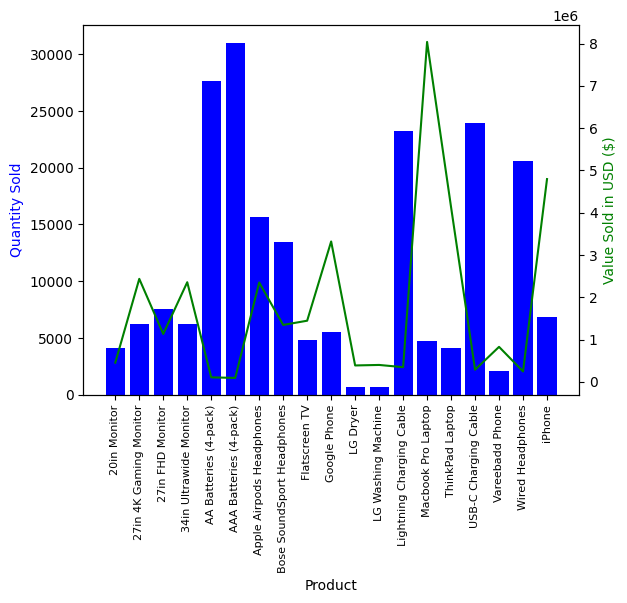

In [ ]:
# show both in same figure
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(sales_by_product['Product'], sales_by_product['Quantity Ordered'], color='b')
ax2.plot(sales_by_product['Product'], sales_by_product['Sales'], color='g')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Sold', color='b')
ax2.set_ylabel('Value Sold in USD ($)', color='g')
ax1.set_xticklabels(sales_by_product['Product'], rotation='vertical', size=8)

fig.show()